# Chapter 12 - Analyzing Textual Data

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import warnings
#warnings.filterwarnings("ignore")

In [3]:
# Input text

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. \
It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal."""

In [4]:
print(paragraph)

Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.


In [5]:
# Converting paragraph in lowercase
print(paragraph.lower())

taj mahal is one of the beautiful monuments. it is one of the wonders of the world. it was built by shah jahan in 1631 in memory of his third beloved wife mumtaj mahal.


In [6]:
import nltk

# Download necessary NLTK data quietly
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

True

In [7]:
from nltk.tokenize import sent_tokenize

tokenized_sentences = sent_tokenize(paragraph)

print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


Let's tokenize the paragraph into sentences using spaCy:

In [9]:
import spacy

# Loading English language model
nlp = spacy.load("en_core_web_sm")

# Append the 'sentencizer' component to the nlp pipeline
nlp.add_pipe('sentencizer')

paragraph = """Taj Mahal is one of the beautiful monuments. It is one of \
the wonders of the world. It was built by Shah Jahan in 1631 in memory of \
his third beloved wife Mumtaj Mahal."""

# Create nlp object to handle linguistic annotations in a document
nlp_doc = nlp(paragraph)

# Generate list of tokenized sentences
tokenized_sentences = [sentence.text for sentence in nlp_doc.sents]

print(tokenized_sentences)

['Taj Mahal is one of the beautiful monuments.', 'It is one of the wonders of the world.', 'It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.']


In [10]:
from nltk.tokenize import word_tokenize

# Split paragraph into words
tokenized_words = word_tokenize(paragraph)

print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


Let's tokenize the paragraph into words using spaCy:

In [12]:
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of \
the wonders of the world. It was built by Shah Jahan in 1631 in memory of \
his third beloved wife Mumtaj Mahal."""

# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)

# tokenize paragraph into words
tokenized_words = []
for token in my_doc:
    tokenized_words.append(token.text)
print(tokenized_words)

['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


Let's create the frequency distribution of tokenized words:

In [14]:
from nltk.probability import FreqDist

# Find frequency distribution of paragraph
fdist = FreqDist(tokenized_words)

# Check top 5 common words
fdist.most_common(5)

[('of', 4), ('the', 3), ('.', 3), ('Mahal', 2), ('is', 2)]

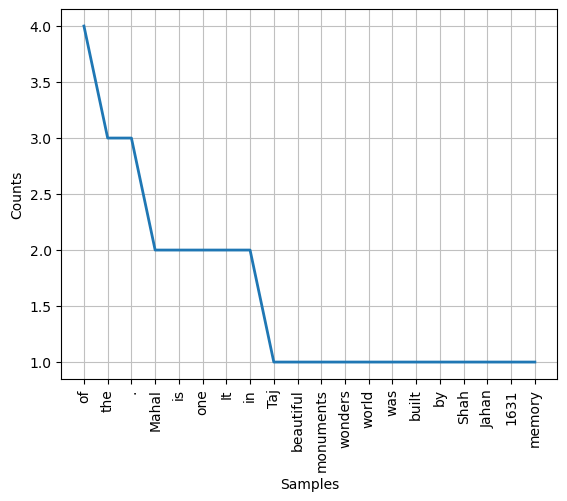

In [15]:
import matplotlib.pyplot as plt

# Plot Frequency Distribution
fdist.plot(20, cumulative=False)
plt.show()

### Removing Stopwords

In [17]:
from nltk.corpus import stopwords

# Load english stopwords list
stopwords_set = set(stopwords.words("english"))

# Removing stopwords from text
filtered_word_list = []
for word in tokenized_words:
    # filter stopwords
    if word not in stopwords_set:
        filtered_word_list.append(word)
        
print("Tokenized Word List:", tokenized_words)
print()
print("Filtered Word List:", filtered_word_list)

Tokenized Word List: ['Taj', 'Mahal', 'is', 'one', 'of', 'the', 'beautiful', 'monuments', '.', 'It', 'is', 'one', 'of', 'the', 'wonders', 'of', 'the', 'world', '.', 'It', 'was', 'built', 'by', 'Shah', 'Jahan', 'in', '1631', 'in', 'memory', 'of', 'his', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']

Filtered Word List: ['Taj', 'Mahal', 'one', 'beautiful', 'monuments', '.', 'It', 'one', 'wonders', 'world', '.', 'It', 'built', 'Shah', 'Jahan', '1631', 'memory', 'third', 'beloved', 'wife', 'Mumtaj', 'Mahal', '.']


In [18]:
print("All tokenized words:",len(tokenized_words))
print("   After the filter:",len(filtered_word_list))

All tokenized words: 37
   After the filter: 23


Let's see how to remove stopwords using spaCy:

In [20]:
# Create nlp Object to handle linguistic annotations in a documents.
my_doc = nlp(paragraph)

# Removing stopwords from text
filtered_token_list = []
for token in my_doc:
    # filter stopwords
    if token.is_stop==False:
        filtered_token_list.append(token)
        
print("Filtered Word List:",filtered_token_list)

Filtered Word List: [Taj, Mahal, beautiful, monuments, ., wonders, world, ., built, Shah, Jahan, 1631, memory, beloved, wife, Mumtaj, Mahal, .]


In [21]:
print("After the spaCy filter:",len(filtered_token_list))

After the spaCy filter: 18


In [22]:
# Convert all elements in both lists to strings
filtered_word_list = [str(word) for word in filtered_word_list]
filtered_token_list = [str(token) for token in filtered_token_list]

# Find elements in `filtered_word_list` that are not in `filtered_token_list`
difference_list_1 = [word for word in filtered_word_list if word not in filtered_token_list]

# Find elements in `filtered_token_list` that are not in `filtered_word_list`
difference_list_2 = [token for token in filtered_token_list if token not in filtered_word_list]

# Print the differences
print("Elements in filtered_word_list but not in filtered_token_list:\n", difference_list_1)
print()
print("Elements in filtered_token_list but not in filtered_word_list:\n", difference_list_2)

Elements in filtered_word_list but not in filtered_token_list:
 ['one', 'It', 'one', 'It', 'third']

Elements in filtered_token_list but not in filtered_word_list:
 []


### Stemming and Lemmatization

In [24]:
from nltk.stem.wordnet import WordNetLemmatizer # Import Lemmatizer
from nltk.stem.porter import PorterStemmer      # Import Porter Stemmer


lemmatizer = WordNetLemmatizer() # Create lemmatizer object
stemmer = PorterStemmer()        # Create stemmer object

# take a sample word
sample_word = "crying"

print("Lemmatized Sample Word:", lemmatizer.lemmatize(sample_word, "v"))
print("   Stemmed Sample Word:", stemmer.stem(sample_word))

Lemmatized Sample Word: cry
   Stemmed Sample Word: cri


Let's see how to get lemmatized words using spaCy:

In [26]:
import spacy

nlp = spacy.load("en_core_web_sm")  # Loading english language model
words = nlp("cry cries crying")     # Create nlp Object to handle linguistic annotations in documents.

# Find lemmatized word
for w in words:
    print('Original Word: ', w.text)
    print('Lemmatized Word: ',w.lemma_)
    print()

Original Word:  cry
Lemmatized Word:  cry

Original Word:  cries
Lemmatized Word:  cry

Original Word:  crying
Lemmatized Word:  cry



In [27]:
words

cry cries crying

In [28]:
type(words)

spacy.tokens.doc.Doc

### POS Tagging

PoS stands for part of speech. The main objective of POS tagging is to discover the syntactic
type of words, such as nouns, pronouns, adjectives, verbs, adverbs, and prepositions.
PoS tagging finds the relationship among words within a sentence.

In [31]:
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Sample sentence
sentence = "Taj Mahal is one of the beautiful monument."

# Tokenize the sentence
sent_tokens = word_tokenize(sentence)

# Create PoS tags
sent_pos = pos_tag(sent_tokens)

# Print tokens with PoS
print(sent_pos)

[('Taj', 'NNP'), ('Mahal', 'NNP'), ('is', 'VBZ'), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('beautiful', 'JJ'), ('monument', 'NN'), ('.', '.')]


In [32]:
from nltk.help import upenn_tagset

# List of POS tags you want to know the meaning of
tags_to_lookup = ['NNP', 'VBZ', 'CD']

# Loop through each tag and display its meaning
for tag in tags_to_lookup:
    print(f"Description for '{tag}':")
    upenn_tagset(tag)
    print("\n" + "-"*50 + "\n")

Description for 'NNP':
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...

--------------------------------------------------

Description for 'VBZ':
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...

--------------------------------------------------

Description for 'CD':
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...

--------------------------------------------------



In [33]:
import spacy

# Loading small english language model
nlp = spacy.load("en_core_web_sm")

# Create nlp Object to handle linguistic annotations in a documents.
sentence = nlp(u"Taj Mahal is one of the beautiful monument.")

for token in sentence:
    print(token.text, token.pos_)

Taj PROPN
Mahal PROPN
is AUX
one NUM
of ADP
the DET
beautiful ADJ
monument NOUN
. PUNCT


### Recognizing Entities

In [35]:
import spacy

# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Sample paragraph
paragraph = """Taj Mahal is one of the beautiful monuments. It is one of \
the wonders of the world. It was built by Shah Jahan in 1631 in memory of \
his third beloved wife Mumtaj Mahal."""

print(paragraph)

Taj Mahal is one of the beautiful monuments. It is one of the wonders of the world. It was built by Shah Jahan in 1631 in memory of his third beloved wife Mumtaj Mahal.


In [36]:
# Create nlp Object to handle linguistic annotations in documents.

docs = nlp(paragraph)
entities = [(i.text, i.label_) for i in docs.ents]
print(entities)

[('Taj Mahal', 'PERSON'), ('Shah Jahan', 'ORG'), ('1631', 'DATE'), ('third', 'ORDINAL'), ('Mumtaj Mahal', 'PERSON')]


In [37]:
from spacy import displacy

# Visualize the entities using render function
displacy.render(docs, style = "ent",jupyter = True)

In [38]:
import spacy

# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Create nlp Object to handle linguistic annotations in a documents.
docs = nlp(sentence)  # sentence = nlp(u"Taj Mahal is one of the beautiful monument.")

# Visualize the using render function
displacy.render(docs, style="dep", jupyter= True, options={'distance':120})

In [39]:
sentence

Taj Mahal is one of the beautiful monument.

In [40]:
type(sentence)

spacy.tokens.doc.Doc

In [41]:
type(docs)

spacy.tokens.doc.Doc

# Creating a Word Cloud

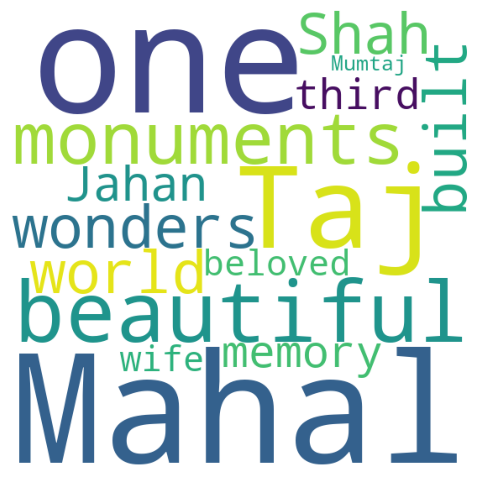

In [43]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

stopword_list = set(STOPWORDS)

paragraph="""Taj Mahal is one of the beautiful monuments. It is one \
of the wonders of the world. It was built by Shah Jahan in 1631 in \
memory of his third beloved wife Mumtaj Mahal."""

word_cloud = WordCloud(width = 550, 
                       height = 550,
                       background_color ='white',
                       stopwords = stopword_list,
                       min_font_size = 10).generate(paragraph)


# Visualize the WordCloud Plot
plt.figure(figsize = (8, 6)) # Set wordcloud figure size
plt.imshow(word_cloud)       # Show image
plt.axis("off")              # Remove Axis
plt.show()                   # show plot

# Bag of Words

Bag of Words (BoW) is one of the most basic, simplest, and popular feature engineering
techniques for converting text into a numeric vector. It works in two steps: collecting
vocabulary words and counting their presence or frequency in the text. It does not consider
the document structure and contextual information. Let's take the following three
documents and understand BoW:

    Document 1: I like pizza.
    Document 2: I do not like burgers.
    Document 3: Pizza and burgers both are junk food.

Now, we will create the Document Term Matrix (DTM). This matrix consists of the
document at rows, words at the column, and the frequency at cell values.

            I like pizza do not burgers and both are junk food
    Doc-1   1  1     1   0   0    0      0   0    0   0    0
    Doc-2   1  1     0   1   1    1      0   0    0   0    0
    Doc-3   0  0     1   0   0    1      1   1    1   1    1

# TF-IDF

TF-IDF stands for **Term Frequency-Inverse Document Frequency**. It has two segments:
**Term Frequency (TF)** and **Inverse Document Frequency (IDF)**. TF only counts the
occurrence of words in each document. It is equivalent to BoW. TF does not consider the
context of words and is biased toward longer documents. IDF computes values that
correspond to the amount of information kept by a word.

$$
\text{IDF}(\text{Word}) = \log_2 \left( \frac{\text{Number of Documents}}{\text{Number of Documents that contain the word}} \right)
$$


            I      like     pizza    do     not     burgers   and     both    are   junk   food
    Doc-1  0.58    0.58     0.58     0       0        0        0       0       0      0     0
    Doc-2  0.58    0.58     0        1.58    1.58     0.58     0       0       0      0     0
    Doc-3  0       0        0.58     0       0        0.58     1.58    1.58    1.58   1.58  1.58

# Classification using BoW

In [52]:
# Use the raw link to access the actual CSV file
url = "https://raw.githubusercontent.com/PacktPublishing/Python-Data-Analysis-Third-Edition/refs/heads/master/Chapter12/amazon_alexa.tsv"

# Reading the CSV file
df = pd.read_csv(url, sep='\t')

# Display the first 5 rows of the DataFrame
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


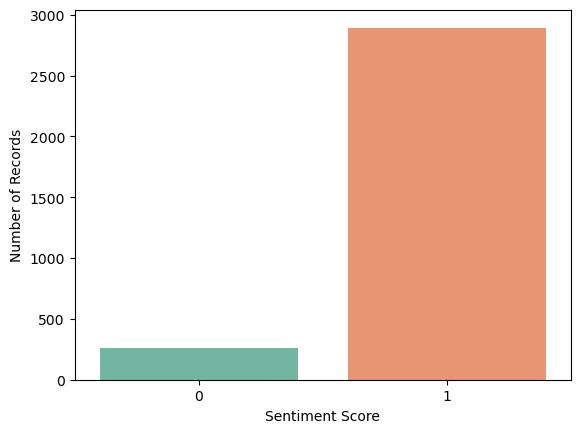

In [53]:
# Count plot with different colors, using 'feedback' as both x and hue
sns.countplot(x='feedback', hue='feedback', data=df, palette='Set2', legend=False)

# Set X-axis and Y-axis labels
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Records')

# Show the plot
plt.show()

In [54]:
# Import CountVectorizer and RegexTokenizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Remove or replace NaN values in 'verified_reviews' column
df['verified_reviews'] = df['verified_reviews'].fillna('')  # Replace NaNs with empty strings

# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize CountVectorizer object
count_vectorizer = CountVectorizer(lowercase=True,
                                   stop_words = 'english',
                                   ngram_range = (1,1),
                                   tokenizer = regex_tokenizer.tokenize,
                                   token_pattern = None)

# Fit and transform the dataset
count_vectors = count_vectorizer.fit_transform(df['verified_reviews'])

In the preceding code, we created a `RegexTokenizer` object with an input
regular expression that removes the special characters and symbols. After this,
the `CountVectorizer` object was created and performed the fit and transform
operation on verified reviews. Here, `CountVectorizer` takes parameters such as
`lowercase` for converting keywords into lowercase, `stop_words` for specifying a
language-specific stopwords list, `ngram_range` for specifying the unigram,
bigram, or trigram, and `tokenizer` is used to pass the `tokenizer` object.
The `RegexTokenizer` object is passed to the `tokenizer` parameter. Finally, we
called the `fit_transform()` function that converts text reviews into a DTM as
per specified parameters.

In [56]:
from sklearn.model_selection import train_test_split

# Partition data into training and testing set
feature_train, feature_test, target_train, target_test = train_test_split(count_vectors, 
                                                                          df['feedback'], 
                                                                          test_size=0.3,
                                                                          random_state=1)

In [57]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression model object
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(" Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))   # Assess model performance using accuracy measure
print("Logistic Regression Model Precision:",precision_score(target_test, predictions))  # Calculate model precision
print("   Logistic Regression Model Recall:",recall_score(target_test, predictions))     # Calculate model recall
print(" Logistic Regression Model F1-Score:",f1_score(target_test, predictions))         # Calculate model f1 score

 Logistic Regression Model Accuracy: 0.9428571428571428
Logistic Regression Model Precision: 0.952433628318584
   Logistic Regression Model Recall: 0.9873853211009175
 Logistic Regression Model F1-Score: 0.9695945945945946


In the preceding code, we have evaluated the model performance using accuracy, precision,
recall, and f1-score using the scikit-learn metrics function. All the measures are
greater than 94%, so we can say that our model is performing well and classifying both the
sentiment levels with a good amount of precision and recall.

In [60]:
# Retrieve the coefficients and the intercept
coefficients = logreg.coef_[0]    # Coefficients for each feature (array)
intercept = logreg.intercept_[0]  # The intercept term

# Extract the feature names from the CountVectorizer
feature_names = count_vectorizer.get_feature_names_out()

# Create a DataFrame to map feature names to their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the magnitude of the coefficients to see the most impactful features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Model Intercept:", intercept)
print("\nFeature Contributions:\n", feature_importance_sorted[['Feature', 'Coefficient']])

Model Intercept: 2.1798652170454003

Feature Contributions:
        Feature  Coefficient
1962      love     2.372754
3311  terrible    -2.041554
1024      easy     1.721030
1427     great     1.586536
3687   working    -1.375291
...        ...          ...
1769    johnny     0.000000
1766   jetsons     0.000000
1758   jacuzzi     0.000000
1742       ish     0.000000
0         abay     0.000000

[3738 rows x 2 columns]


In [61]:
print("Model Intercept:", intercept)
print("\nTop 20 Feature Contributions:\n", feature_importance_sorted[['Feature', 'Coefficient']].head(20))

Model Intercept: 2.1798652170454003

Top 20 Feature Contributions:
           Feature  Coefficient
1962         love     2.372754
3311     terrible    -2.041554
1024         easy     1.721030
1427        great     1.586536
3687      working    -1.375291
1327          fun     1.231752
3437          try    -1.223592
3697    worthless    -1.215349
2971         siri    -1.188156
2762     returned    -1.158120
1460         half    -1.155372
3528      useless    -1.147121
977          dont    -1.142133
2888         sent    -1.117092
887          didn    -1.111912
2409     playlist    -1.089484
327          best     1.049467
1161     expected     1.046554
933   disconnects    -1.005148
2344      perfect     0.983159


# Classification using TF-IDF

In [63]:
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Regex tokenizer for removing special symbols and numeric values
regex_tokenizer = RegexpTokenizer(r'[a-zA-Z]+')

# Initialize TfidfVectorizer object with `token_pattern=None`
tfidf = TfidfVectorizer(lowercase=True, 
                        stop_words='english',
                        ngram_range=(1, 1),
                        tokenizer=regex_tokenizer.tokenize,
                        token_pattern=None)  # Suppress the warning by setting `token_pattern=None`

# Fit and transform the dataset
text_tfidf = tfidf.fit_transform(df['verified_reviews'])

In the preceding code, we created a `RegexTokenizer` object with an input
regular expression that removes the special characters and symbols. After this,
the `TfidfVectorizer` object was created and performed the fit and transform
operation on verified reviews. Here, `TfidfVectorizer` takes parameters such as
`lowercase` for converting keywords into lowercase, `stop_words` for a specified
language-specific stopwords list, `ngram_range` for specifying the unigram,
bigram, or trigram, and tokenizer is used to pass the tokenizer object. The
`RegexTokenizer` object is passed to the tokenizer parameter. Finally, we called
the `fit_transform()` function that converts text reviews into a DTM as per
specified parameters.

In [65]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(text_tfidf, 
                                                                          df['feedback'], 
                                                                          test_size=0.3, 
                                                                          random_state=1)

In [66]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train,target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)

In the preceding code, we imported `LogisticRegression` and created the
`LogisticRegression` object. After creating the model object, we performed a
`fit()` operation on the training data and `predict()` to forecast the sentiment for
the test dataset.

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print(" Logistic Regression Model Accuracy:",accuracy_score(target_test, predictions))  # Assess model performance using accuracy measure
print("Logistic Regression Model Precision:",precision_score(target_test, predictions)) # Calculate model precision
print("   Logistic Regression Model Recall:",recall_score(target_test, predictions))    # Calculate model recall
print(" Logistic Regression Model F1-Score:",f1_score(target_test, predictions))        # Calculate model f1 score

 Logistic Regression Model Accuracy: 0.9248677248677248
Logistic Regression Model Precision: 0.9247083775185578
   Logistic Regression Model Recall: 1.0
 Logistic Regression Model F1-Score: 0.9608815426997245


In the preceding code, we evaluated the model performance using accuracy, precision,
recall, and f1-score using the scikit-learn metrics function. All the measures are greater
than 92%, so we can say that our model is performing well and classifying both sentiment
levels with a good amount of precision and recall. In this section, we have looked at
sentiment analysis using text classification.

In [70]:
# Retrieve the coefficients and the intercept from the logistic regression model
coefficients = logreg.coef_[0]    # Coefficients for each feature (array)
intercept = logreg.intercept_[0]  # The intercept term

# Extract the feature names from the TfidfVectorizer
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame to map feature names to their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the magnitude of the coefficients to see the most impactful features
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance_sorted = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print("Model Intercept:", intercept)
print("\nFeature Contributions:\n", feature_importance_sorted[['Feature', 'Coefficient']])

Model Intercept: 2.012336752970515

Feature Contributions:
          Feature  Coefficient
1962        love     3.608858
1427       great     2.718192
3259           t    -2.310443
1024        easy     2.092211
3311    terrible    -1.888943
...          ...          ...
1740  irritating     0.000000
1737     ipdates     0.000000
3295       techy     0.000000
1736       ipads     0.000000
0           abay     0.000000

[3738 rows x 2 columns]


In [71]:
print("Model Intercept:", intercept)
print("\nTop 20 Feature Contributions:\n", feature_importance_sorted[['Feature', 'Coefficient']].head(20))

Model Intercept: 2.012336752970515

Top 20 Feature Contributions:
         Feature  Coefficient
1962       love     3.608858
1427      great     2.718192
3259          t    -2.310443
1024       easy     2.092211
3311   terrible    -1.888943
3687    working    -1.764053
3437        try    -1.490179
146      amazon    -1.439571
1888       like     1.399893
887        didn    -1.348805
3690      works     1.340873
3683       work    -1.295589
1327        fun     1.289926
1460       half    -1.193073
3697  worthless    -1.145131
2144       need    -1.127027
2762   returned    -1.120810
1161   expected     1.093323
2118      music     1.084383
2344    perfect     1.065818


# Text Similarity

Text similarity is the process of determining the two closest texts. Text similarity is very
helpful in finding similar documents, questions, and queries. For example, a search engine
such as Google uses similarity to find document relevance, and Q&A systems such as
StackOverflow or a consumer service system use similar questions. There are two common
metrics used for text similarity, namely **Jaccard** and **cosine similarity**.

In [74]:
import spacy

# Load English model for tokenizer, tagger, parser, and NER
nlp = spacy.load('en_core_web_sm')

# Create documents
doc1 = nlp(u'I love pets.')
doc2 = nlp(u'I hate pets')

# Find similarity
print(doc1.similarity(doc2))

0.6362041590639654


C:\Users\lsoares\AppData\Local\Temp\ipykernel_71480\1502796748.py:11: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(doc1.similarity(doc2))


In the preceding code block, we have found the similarity between two sentences using
spaCy's `similarity()` function. Spacy's similarity function does not give better results
with small models (such as the `en_core_web_sm`); that's why you will get a
warning. To remove this warning, use larger models such
as `en_core_web_md`.

## Jaccard Similarity

Jaccard similarity calculates the similarity between two sets by the ratio of common words
(intersection) to totally unique words (union) in both sets. It takes a list of unique words in
each sentence or document. It is useful where the repetition of words does not matter.
Jaccard similarity ranges from 0-100%; the higher the percentage, the more similar the two
populations:

$$
J(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

In [79]:
def jaccard_similarity(sent1, sent2):
    
    """Find text similarity using jaccard similarity"""
    
    # Tokenize sentences
    token1 = set(sent1.split())
    token2 = set(sent2.split())
    
    intersection_tokens = token1.intersection(token2)         # intersection between tokens of two sentences
    union_tokens=token1.union(token2)                         # Union between tokens of two sentences
    sim_= float(len(intersection_tokens) / len(union_tokens)) # Cosine Similarity
    
    return sim_
    
jaccard_similarity('I love pets.','I hate pets.')

0.5

## Cosine Similarity

Cosine similarity computes the cosine of the angle between two multidimensional projected
vectors. It indicates how two documents are related to each other. Two vectors can be made
of the bag of words or TF-IDF or any equivalent vector of the document. It is useful where
the duplication of words matters. Cosine similarity can measure text similarity irrespective
of the size of documents.

$$
\text{Cosine Similarity}(A, B) = \frac{A \cdot B}{|A| \cdot |B|}
$$

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

docs = ['I love pets.','I hate pets.']

tfidf= TfidfVectorizer()                  # Initialize TfidfVectorizer object
tfidf_vector = tfidf.fit_transform(docs)  # Fit and transform the given data

cos_sim=cosine_similarity(tfidf_vector, tfidf_vector) # compute similarity using cosine similarity

print(cos_sim)

[[1.         0.33609693]
 [0.33609693 1.        ]]


In [84]:
# Extract the element from the cosine similarity matrix
similarity_score = cos_sim[0, 1]  # Access the element at row 0, column 1

print("Cosine Similarity between doc1 and doc2:", similarity_score.round(4))

Cosine Similarity between doc1 and doc2: 0.3361
